In [1]:
import numpy as np
import pandas as pd

In [41]:
train_data=pd.read_csv("../Bike_sharing_demand/train.csv")

In [42]:
train_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [23]:
from datetime import datetime
import calendar

In [43]:
train_data['date']=train_data['datetime'].apply(lambda x: x.split()[0])
train_data['hour']=train_data['datetime'].apply(lambda x:x.split()[1].split(':')[0])
train_data['weekday']=train_data['date'].apply(lambda datestring: calendar.day_name[datetime.strptime(datestring,"%Y-%m-%d").weekday()])
train_data['month']=train_data['date'].apply(lambda datestring: calendar.month_name[datetime.strptime(datestring,"%Y-%m-%d").month])

In [44]:
train_data["season"] = train_data['season'].map({1: "Spring", 2 : "Summer", 3 : "Fall", 4 :"Winter" })
train_data["weather"] = train_data['weather'].map({1: " Clear + Few clouds + Partly cloudy + Partly cloudy",\
                                        2 : " Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist ", \
                                        3 : " Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds", \
                                        4 :" Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog " })

In [45]:
train_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,hour,weekday,month
0,2011-01-01 00:00:00,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.84,14.395,81,0.0,3,13,16,2011-01-01,00,Saturday,January
1,2011-01-01 01:00:00,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.02,13.635,80,0.0,8,32,40,2011-01-01,01,Saturday,January
2,2011-01-01 02:00:00,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.02,13.635,80,0.0,5,27,32,2011-01-01,02,Saturday,January
3,2011-01-01 03:00:00,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.84,14.395,75,0.0,3,10,13,2011-01-01,03,Saturday,January
4,2011-01-01 04:00:00,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.84,14.395,75,0.0,0,1,1,2011-01-01,04,Saturday,January


In [46]:
train_data  = train_data.drop(["datetime"],axis=1)

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<b>Inferences made </b>
<p>1.Spring season has got relatively lower count.The dip in median value in boxplot gives evidence for it.</p>
<p>2.The boxplot with "Hour Of The Day" is quiet interesting.The median value are relatively higher at 7AM - 8AM and 5PM - 6PM. It can be attributed to regular school and office users at that time.</p>
<p>3.Most of the outlier points are mainly contributed from "Working Day" than "Non Working Day". It is quiet visible from from figure 3.</p>

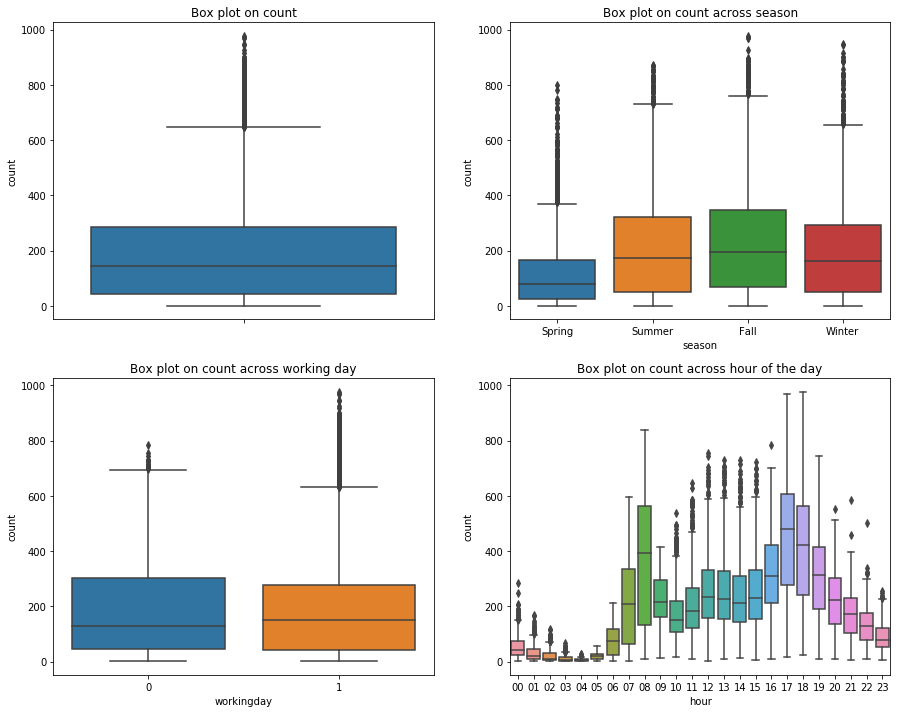

In [47]:
fig,axes=plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(15,12)
sns.boxplot(y='count',data=train_data,orient='v',ax=axes[0][0])
sns.boxplot(x='season',y='count',data=train_data,orient='v',ax=axes[0][1])
sns.boxplot(x='workingday',y='count',data=train_data,orient='v',ax=axes[1][0])
sns.boxplot(x='hour',y='count',data=train_data,orient='v',ax=axes[1][1])

axes[0][0].set(ylabel='count',title='Box plot on count')
axes[0][1].set(xlabel='season',ylabel='count',title='Box plot on count across season')
axes[1][0].set(xlabel='workingday',ylabel='count',title='Box plot on count across working day')
axes[1][1].set(xlabel='hour',ylabel='count',title='Box plot on count across hour of the day')


<b>Removing outliers </b>

In [49]:
train_data_without_outliers=train_data[np.abs(train_data['count']-train_data['count'].mean())<=3*train_data['count'].std()]

In [50]:
print(train_data.shape)
print(train_data_without_outliers.shape)

(10886, 15)
(10739, 15)


<b>Correlation Analysis</b>

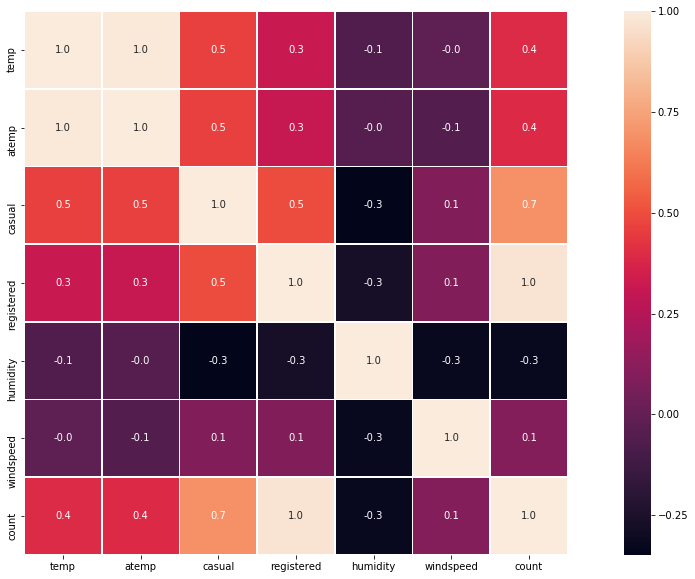

In [54]:
corrMat=train_data[["temp","atemp","casual","registered","humidity","windspeed","count"]].corr()
fig,ax= plt.subplots(figsize=(20,10))
sns.heatmap(corrMat,linewidth=0.5,annot=True,square=True,fmt='.1f')

<p>1. Windspeed is not very useful as it has got very less correlation with count</p>
<p>2. temp and atemp are highly correlated so atemp can be dropped </p>
<p>3. Registered and casual are leakage variables so they have to be dropped.</p>

<b> Visualizing count vs Month,Hour,weekday</b>

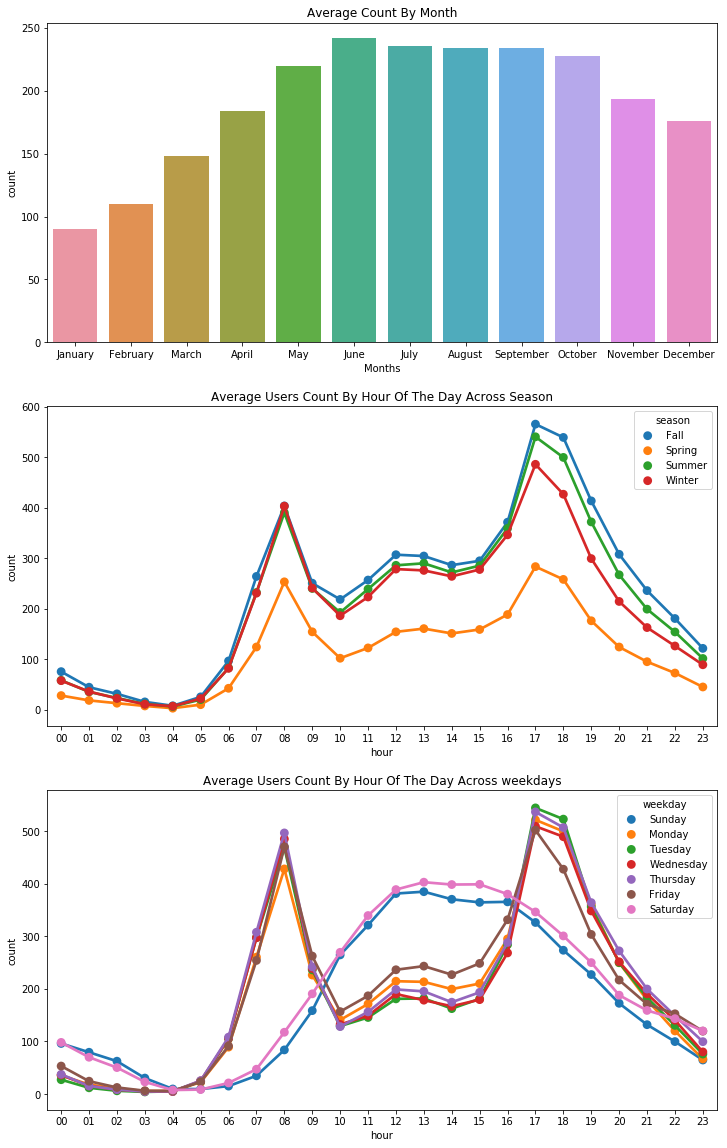

In [62]:
fig,(ax1,ax2,ax3)=plt.subplots(nrows=3)
fig.set_size_inches(12,20)
sortOrder = ["January","February","March","April","May","June","July","August","September","October","November","December"]
monthAggregated=pd.DataFrame(train_data.groupby("month")["count"].mean()).reset_index()
sns.barplot(data=monthAggregated,x='month',y='count',ax=ax1,order=sortOrder)
ax1.set(xlabel='Months',ylabel='count',title='Average Count By Month')

hourAggregated=pd.DataFrame(train_data.groupby(["hour","season"])["count"].mean()).reset_index()
sns.pointplot(x=hourAggregated['hour'],y=hourAggregated['count'],hue=hourAggregated['season'],data=hourAggregated,ax=ax2,join=True)
ax2.set(ylabel='count',xlabel='hour',title='Average Users Count By Hour Of The Day Across Season')

hueOrder = ["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]
hourAggregated=pd.DataFrame(train_data.groupby(["hour","weekday"])["count"].mean()).reset_index()
sns.pointplot(x=hourAggregated['hour'],y=hourAggregated['count'],hue=hourAggregated['weekday'],hue_order=hueOrder,data=hourAggregated,ax=ax3,join=True)
ax3.set(ylabel='count',xlabel='hour',title='Average Users Count By Hour Of The Day Across weekdays')


In [66]:
dataTrain=pd.read_csv("../Bike_sharing_demand/train.csv")
dataTest=pd.read_csv("../Bike_sharing_demand/test.csv")

In [67]:
test_data.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
count,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000
mean,2.493300,0.029108,0.685815,1.436778,20.620607,24.012865,64.125212,12.631157
std,1.091258,0.168123,0.464226,0.648390,8.059583,8.782741,19.293391,8.250151
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.000000,16.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,49.000000,7.001500
50%,3.000000,0.000000,1.000000,1.000000,21.320000,25.000000,65.000000,11.001400
75%,3.000000,0.000000,1.000000,2.000000,27.060000,31.060000,81.000000,16.997900
max,4.000000,1.000000,1.000000,4.000000,40.180000,50.000000,100.000000,55.998600


In [68]:
test_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [94]:
data=dataTrain.append(dataTest)
data.reset_index(inplace=True)
data.drop('index',inplace=True,axis=1)

In [86]:
data.head()

,atemp,casual,count,datetime,holiday,humidity,registered,season,temp,weather,windspeed,workingday
0,14.395,3.0,16.0,2011-01-01 00:00:00,0,81,13.0,1,9.84,1,0.0,0
1,13.635,8.0,40.0,2011-01-01 01:00:00,0,80,32.0,1,9.02,1,0.0,0
2,13.635,5.0,32.0,2011-01-01 02:00:00,0,80,27.0,1,9.02,1,0.0,0
3,14.395,3.0,13.0,2011-01-01 03:00:00,0,75,10.0,1,9.84,1,0.0,0
4,14.395,0.0,1.0,2011-01-01 04:00:00,0,75,1.0,1,9.84,1,0.0,0


In [95]:
data['date']=data['datetime'].apply(lambda x: x.split()[0])
data['hour']=data['datetime'].apply(lambda x: x.split()[1].split(':')[0])
data['year']=data['datetime'].apply(lambda x: x.split("-")[0])
data["weekday"]=data['date'].apply(lambda datestring : datetime.strptime(datestring,"%Y-%m-%d").weekday())
data["month"]=data['date'].apply(lambda datestring : datetime.strptime(datestring,"%Y-%m-%d").month)

In [96]:
data.head()

,atemp,casual,count,datetime,holiday,humidity,registered,season,temp,weather,windspeed,workingday,date,hour,year,weekday,month
0,14.395,3.0,16.0,2011-01-01 00:00:00,0,81,13.0,1,9.84,1,0.0,0,2011-01-01,00,2011,5,1
1,13.635,8.0,40.0,2011-01-01 01:00:00,0,80,32.0,1,9.02,1,0.0,0,2011-01-01,01,2011,5,1
2,13.635,5.0,32.0,2011-01-01 02:00:00,0,80,27.0,1,9.02,1,0.0,0,2011-01-01,02,2011,5,1
3,14.395,3.0,13.0,2011-01-01 03:00:00,0,75,10.0,1,9.84,1,0.0,0,2011-01-01,03,2011,5,1
4,14.395,0.0,1.0,2011-01-01 04:00:00,0,75,1.0,1,9.84,1,0.0,0,2011-01-01,04,2011,5,1


In [89]:
category=['weather','season','hour','year','month','weekday','workingday','holiday']
numerical=['temp','atemp','humidity','windspeed']
dropFeatures=['count','datetime','date','casual','registered','atemp']

In [90]:
for var in category:
    data[var]=data[var].astype('category')

<b>Random Forest to predict 0s in WindSpeed</b>

from sklearn.ensemble import RandomForestRegressor

dataWind0=data[data['windspeed']==0]
dataWindnot0=data[data['windspeed']!=0]
rf=RandomForestRegressor()
col=['season','weather','humidity','temp','month','year']
rf.fit(dataWindnot0[col],dataWindnot0['windspeed'])
wind0values=rf.predict(X=dataWind0[col])
dataWind0['windspeed']=wind0values
data=dataWindnot0.append(dataWind0)
data.reset_index(inplace=True)
data.drop('index',inplace=True,axis=1)


<b>Splitting Train And Test Data</b>

In [98]:
dataTrain=data[pd.notnull(data['count'])].sort_values(by=["datetime"])
dataTest=data[~pd.notnull(data['count'])].sort_values(by=["datetime"])
dateTimecol=dataTest['datetime']
ylabels=dataTrain['count']
yLablesRegistered = dataTrain["registered"]
yLablesCasual = dataTrain["casual"]

<b>Dropping unnecessary variables</b>

In [100]:
dataTrain  = dataTrain.drop(dropFeatures,axis=1)
dataTest  = dataTest.drop(dropFeatures,axis=1)

<b>RMSLE Scorer</b>

In [101]:
def rmsle(y,y_,convertExp=True):
    if(convertExp):
        y=np.exp(y)
        y_=np.exp(y_)
    log1=np.nan_to_num(np.array([np.log(v+1) for v in y]))
    log2=np.nan_to_num(np.array([np.log(v+1) for v in y_]))
    calc=(log1-log2)**2
    return np.sqrt(np.mean(calc))

In [103]:
from sklearn.ensemble import RandomForestRegressor
rfModel = RandomForestRegressor(n_estimators=100)
yLabelsLog = np.log1p(ylabels)
rfModel.fit(dataTrain,yLabelsLog)
preds = rfModel.predict(X= dataTrain)
print ("RMSLE Value For Random Forest: ",rmsle(np.exp(yLabelsLog),np.exp(preds),False))


RMSLE Value For Random Forest:  0.102791578172


In [105]:
predTest=rfModel.predict(X=dataTest)
submission=pd.DataFrame({"datetime":dateTimecol,"count": [max(0, x) for x in np.exp(predTest)]})
submission.to_csv('../Bike_sharing_demand/bike_rfr.csv',index=False)

In [107]:
from sklearn.ensemble import GradientBoostingRegressor
gbm = GradientBoostingRegressor(n_estimators=4000,alpha=0.01); ### Test 0.41
yLabelsLog = np.log1p(ylabels)
gbm.fit(dataTrain,yLabelsLog)
preds = gbm.predict(X= dataTrain)
print ("RMSLE Value For Gradient Boost: ",rmsle(np.exp(yLabelsLog),np.exp(preds),False))

RMSLE Value For Gradient Boost:  0.191210248039


In [108]:
predTest=gbm.predict(X=dataTest)
submission=pd.DataFrame({"datetime":dateTimecol,"count": [max(0, x) for x in np.exp(predTest)]})
submission.to_csv('../Bike_sharing_demand/bike_gbm.csv',index=False)